# Part 1: Identifying "Top Selling" Items
We define top selling items as items which had the greatest total sales over this week across all countries.

In [1]:
from util import make_predictions

import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use("ggplot")
%matplotlib inline

In [2]:
df = pd.read_csv("data/Online Retail.csv", encoding = "ISO-8859-1")
df.shape

(541909, 8)

In [3]:
# remove cancelled invoices, which are invoices where InvoiceNo starts with the letter "c"
df['cancelled'] = df.apply(lambda row: str(row.InvoiceNo)[0] == "c", axis=1) 
print("number of cancelled invoices: ", np.sum(df['cancelled']))

number of cancelled invoices:  0


In [4]:
# create a "revenue" column so we can identify best selling items for a given range
df['revenue'] = df.apply(lambda row: row.Quantity * row.UnitPrice, axis=1) 

In [5]:
# create a "data" column so we can identify best selling items for a given range
df["date"] = df.apply(lambda row: row.InvoiceDate.split(" ")[0], axis=1) 
df["timestamp"] = df.apply(lambda x: time.mktime(datetime.datetime.strptime(x['date'], "%m/%d/%y").timetuple()), axis = 1) 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancelled,revenue,date,timestamp
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,False,15.30,12/1/10,1.291180e+09
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,False,20.34,12/1/10,1.291180e+09
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,False,22.00,12/1/10,1.291180e+09
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,False,20.34,12/1/10,1.291180e+09
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,False,20.34,12/1/10,1.291180e+09


In [6]:
# we want best selling items for the period between 11/27/11 and 12/3/11

start = "11/27/11"
end = "12/3/11"

select = (df['timestamp'] <= time.mktime(datetime.datetime.strptime(end, "%m/%d/%y").timetuple())) & (df['timestamp'] >= time.mktime(datetime.datetime.strptime(start, "%m/%d/%y").timetuple()))
df_small = df[select]

Text(0, 0.5, 'Revenue')

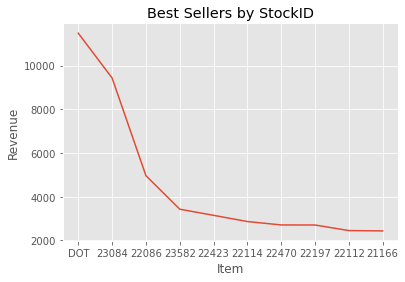

In [7]:
qty = df_small.groupby("StockCode")['revenue'].sum().sort_values(ascending=False)[:10]

plt.plot(qty)
plt.title("Best Sellers by StockID")
plt.xlabel("Item")
plt.ylabel("Revenue")

In [8]:
# return a list of best sellers by stock id over that period
best_sellers = list(df_small.groupby("StockCode")['Quantity'].sum().sort_values(ascending=False)[:3].index)
best_sellers

['23084', '22197', '23582']

# Part 2 - By Country
Given a stockcode id, return a dataframe containing predictions by country.

Build a model that predicts sales quantities for the 7 days from 11/27/2011 - 12/3/2011.

In [9]:
# generate training data

cutoff = "11/27/11"
select = (df['timestamp'] <= time.mktime(datetime.datetime.strptime(cutoff, "%m/%d/%y").timetuple()))
train_df = df[select]
sorted_train_df = train_df.sort_values('timestamp')
sorted_train_df.shape

(505287, 12)

In [12]:
test_period = ['11/27/11', '11/28/11', '11/29/11', '11/30/11', '12/1/11', '12/2/11', '12/3/11']

In [ ]:
for best_seller in best_sellers:
    print("> Predicting for item", best_seller)
    p = make_predictions(sorted_train_df, stockcode_id=best_seller, period=test_period)
    p.to_csv("./results/" + best_seller + "results.csv")

INFO:fbprophet:n_changepoints greater than number of observations. Using 2.


> Predicting for item 23084


INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
